In [7]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import pyreadr

In [8]:
community = pyreadr.read_r('../../data/LR_database.rda')

In [9]:
community = result["LR_database"]

In [11]:
#cellphone_db uses sql database with multiple tables, we export these tables into csv and re-organise the pairs
#into one df

#explained in /RestructureCPDB/BreakdownCPDB.ipynb

cpdb = pd.read_csv ('cpdb_original.csv', index_col=None)

In [13]:
nnet_lr = pd.read_csv ('nichenetr_lr.csv', index_col=None)

In [14]:
#create pairs in nnet
nnet_lr["pairs"]=nnet_lr["from"] + "_" + nnet_lr["to"]

In [15]:
#get unique list of pairs in Commpackage
community_pairs = set(community['Pair.Name'])

In [16]:
#get unique list of pairs in cpdb

cpdb_pairs = set(cpdb['pairs'])

In [17]:
#get unique list of pairs in nnet

nnet_pairs = set(nnet_lr['pairs'])

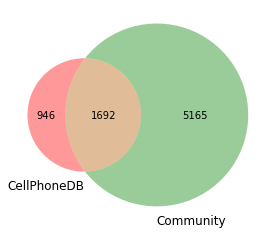

In [19]:
#plot pairs of CellPhoneDB vs ComPackage
venn2([cpdb_pairs, community_pairs], ('CellPhoneDB', 'Community'))
plt.savefig('ComparisonFigures/cpdb-community.pdf')

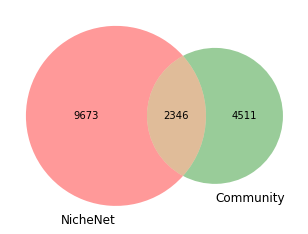

In [20]:
#plot pairs of NicheNet vs ComPackage
venn2([nnet_pairs, community_pairs], ('NicheNet', 'Community'))
plt.savefig('ComparisonFigures/NicheNet-community.pdf')

In [21]:
#nnet predicted 10.629 pairs, lets see how does the comparison look without the predicted pairs
nnet_nopridcition=nnet_lr[~nnet_lr["database"].str.contains("ppi_")]

In [22]:
nopredict_pairs=set(nnet_nopridcition["pairs"])

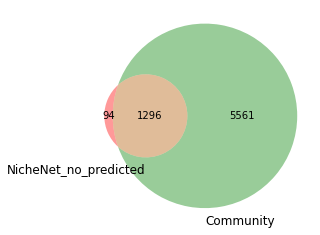

In [25]:
#plot pairs of NicheNet without predicted pairs vs ComPackage

venn2([nopredict_pairs, community_pairs], ('NicheNet_no_predicted', 'Community'))
plt.savefig('ComparisonFigures/NicheNet_no_predicted-compackage.pdf')

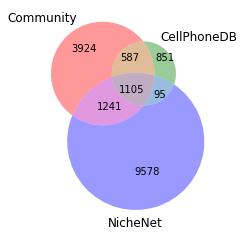

In [26]:
#plot pairs of 3 DBs in one

venn3([community_pairs,cpdb_pairs, nnet_pairs], ("Community",'CellPhoneDB', 'NicheNet'))
plt.savefig('ComparisonFigures/3in1.pdf')

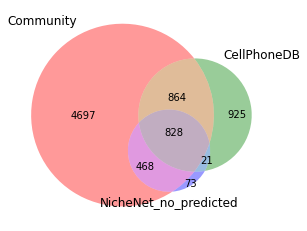

In [27]:
#plot pairs of 3 DBs in one, but in this one we do not include the predicted pairs for NicheNet
venn3([community_pairs,cpdb_pairs, nopredict_pairs], ("Community",'CellPhoneDB', 'NicheNet_no_predicted'))
plt.savefig('ComparisonFigures/3in1_NoPredicted.pdf')

In [34]:
community_gene_space = set([substring for value in list(community_pairs) for substring in value.split('_')])

In [35]:
cpdb_gene_space = set([substring for value in list(cpdb_pairs) for substring in value.split('_')])

In [36]:
nnet_gene_space = set([substring for value in list(nnet_pairs) for substring in value.split('_')])

In [38]:
nnet_nopredict_gene_space = set([substring for value in list(nopredict_pairs) for substring in value.split('_')])

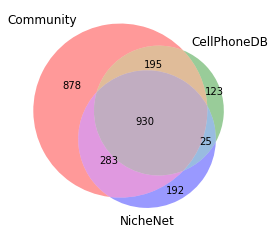

In [37]:
#plot gene space of 3 DBs in one

venn3([community_gene_space,cpdb_gene_space, nnet_gene_space], ("Community",'CellPhoneDB', 'NicheNet'))
plt.savefig('ComparisonFigures/gene_space.pdf')

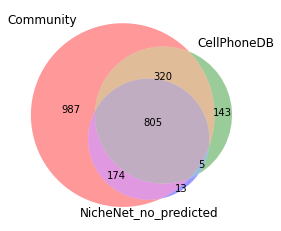

In [39]:
#plot gene space of 3 DBs in one

venn3([community_gene_space,cpdb_gene_space, nnet_nopredict_gene_space], ("Community",'CellPhoneDB', 'NicheNet_no_predicted'))
plt.savefig('ComparisonFigures/gene_space_without_predict.pdf')